# Python - Data Analysis and Visualization

**Author:** Nina Rauscher

*Girls Who Code - Class 3 - Week 3 - 10/28/2023*

This week, we will focus on the most common tools to manipulate data and extract insights from it, covering the basics of data cleaning, data analysis and data visualization.

Eventually, we will apply these techniques to [billboard 200](https://www.billboard.com/charts/billboard-200/) data as a group exercise.

## Prerequisites - Types of data in Data Analysis

We will use a library called Pandas which is great for data manipulation, data visualization, data analysis, and presenting results.




### Categorical data

This corresponds to data with a **fixed (finite) set of values** and **not necessarily ordered**. Pandas uses a <b>Categorical</b> data type to represent this type of data.


Ex: *gender, marital status, income level, semester grade etc.*


### Continuous data

Data that is drawn from an **infinite set of ordered values** and there are an infinite number of values between any two data elements. Pandas uses the numpy **float** and **int** types to represent this type of data.

Ex: *stock prices, sales revenue, dollar income, etc.*


### Discrete data

**Numerical data that cannot be atomized further.** Pandas uses the numpy **int** to represent this type of data.

Ex: *All counts of categorical data (Number of males, number of blue cars, etc.)*

### Pandas - Series

Pandas organizes data into two data objects. The first one is **Series**, which are one-dimensional arrays.

You can imagine a *Series* object as **a column from a table**; all elements in it have the same data type.

In [ ]:
# Let's import NumPy and Pandas libraries and create our first Series

import pandas as pd
import numpy as np

array_random_numbers = np.random.randint(100,size=1000) # Create an array of 1000 random integers between 0 and 99
x = pd.Series(array_random_numbers) # Transform this array into a Series using Pandas
x[:10] # Print the first 10 elements of this Series

0    13
1    62
2    11
3    14
4    68
5     5
6    81
7    79
8    30
9    82
dtype: int64

As you can see from above, accessing elements works as with lists or arrays, using square brackets and the indices of the elements we want.

To return only the first elements of a Series, we use `head`. Likewise, we can return the last elements of a Series using `tail`. Both functions have a default parameter of 5.



In [ ]:
x.head()

0    18
1    95
2     2
3    24
4    92
dtype: int64

In [ ]:
x.head(3)

0    18
1    95
2     2
dtype: int64

In [ ]:
x.tail()

995    56
996    44
997    99
998    40
999    73
dtype: int64

In [ ]:
x.tail(6)

994    48
995    56
996    44
997    99
998    40
999    73
dtype: int64

Every Series contains an **index** and the **values of each index item** (see the two columns printed above). Series items are thus accessed through their index which can be an integer like above but not only:

In [ ]:
dictionary = {'a':1,'b':2,'c':3}
y=pd.Series(dictionary) # A dictionary will be broken up into index and value pairs
print(y['b']) # Access the value of the item with index 'b'

2


We can also iterate through the Series to see all the values:

In [ ]:
for i in x.index:
    print(x[i])

18
95
2
24
92
19
52
84
68
90
70
0
51
77
0
40
86
85
30
84
1
16
73
19
84
2
62
2
55
7
15
37
83
49
0
12
91
82
96
47
10
90
36
89
31
35
40
33
54
98
95
88
95
64
58
18
83
66
83
37
24
59
39
43
67
95
36
67
92
56
27
2
14
68
34
46
29
58
17
95
39
68
95
79
61
22
43
13
76
3
76
44
54
65
27
61
72
49
10
26
82
74
58
28
20
9
45
5
90
69
26
44
41
53
15
90
24
75
10
76
27
74
32
80
36
3
1
15
99
45
73
25
92
40
84
49
50
52
50
83
8
66
99
64
54
19
67
2
53
90
81
34
80
24
7
47
70
32
28
6
25
76
71
90
71
12
73
52
95
23
40
95
11
77
31
96
36
46
68
56
73
40
41
8
79
60
54
21
86
25
80
9
12
13
23
12
25
86
98
91
33
31
76
6
31
35
83
84
69
32
29
40
96
40
35
26
66
11
3
35
24
97
86
78
93
22
96
38
78
95
4
81
18
69
28
5
84
22
81
26
93
69
39
27
80
41
87
5
18
29
18
87
33
16
83
11
93
32
31
22
32
25
57
51
12
70
50
29
89
83
4
63
88
10
75
72
66
92
60
36
11
50
60
7
65
60
84
67
7
40
15
43
94
17
10
18
27
32
33
7
25
93
56
65
48
58
17
81
18
70
10
1
20
27
55
65
38
78
23
93
33
95
6
34
41
29
33
38
22
52
76
50
33
7
73
22
24
59
64
87
90
15
58
38


Series objects work like numpy *ndarrays* but with an independent index attached to the values of the array. The index can be of any immutable data type.

In [ ]:
type(y.values)

numpy.ndarray

In [ ]:
nums = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
names = np.array(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
months = pd.Series(nums,index=names)
months['Mar']

3

In [ ]:
months.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

Series objects are considered to be "ordered" so we can also access objects by row number:

In [ ]:
months[2]

3

And we can find the row number given an index value and then use that to access the data at that row:

In [ ]:
row = months.index.get_loc('Mar')
months.iloc[row] # iloc works with the row number

3

In [ ]:
months.loc['Mar'] # while loc works with the index

3

Besides, we can do NumPy operations on Series as we would do with arrays: addition, scalar multiplication, ...

### Pandas - DataFrames

A **DataFrame** is a **2-Dimensional structure** that you can imagine as an Excel spreadsheet.

Unlike Series, a DataFrame's columns can contain **data of different types**. Rows have an index which by default is an integer corresponding to the row number but can be changed.

In [ ]:
# Let's construct our first DataFrame
df = pd.DataFrame([[11,22,13],[21,22,23]])
df

,0,1,2
0,11,22,13
1,21,22,23


In [ ]:
# Now, change the column names and indices
df.columns=['c1','c2','c3']
df.index = ['a','b']
df

,c1,c2,c3
a,11,22,13
b,21,22,23


In [ ]:
# We could also have defined it from the start
df = pd.DataFrame([[11,22,13],[21,22,23]],index=['a','b'],columns=['c1','c2','c3'])
df

,c1,c2,c3
a,11,22,13
b,21,22,23


In [ ]:
# DataFrames can be defined from a dictionary

from datetime import date

data = {'AAPL':[217.2,218.7],'GOOG':[1166.2,1161.5],'GS':[235.3,231.1]}
df = pd.DataFrame(data)
df.index = [date(2018,9,21),date(2018,9,24)]
df

,AAPL,GOOG,GS
2018-09-21,217.2,1166.2,235.3
2018-09-24,218.7,1161.5,231.1


In [ ]:
# We can use an existing column as an index
import pandas as pd
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(df)
df.set_index('row_label',inplace=True) # We need to specify True as by default, the former index column isn't deleted
print(df)

  row_label   A   B   C
0        r1  00  01  02
1        r2  10  11  12
2        r3  20  21  22
            A   B   C
row_label            
r1         00  01  02
r2         10  11  12
r3         20  21  22


In [ ]:
# We can print a single column by using .
df.A

row_label
r1    00
r2    10
r3    20
Name: A, dtype: object

In [ ]:
# And select rows with loc if referring to the index
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

In [ ]:
# Or iloc if referring to the row number
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

In [ ]:
# It is also possible to use chain indexing to access a specific cell
df.iloc[0][1] # Should return the 2nd (1) element of the 1st row (0)

'01'

In [ ]:
# Let's add a new column, using a pattern
import numpy as np
df['D'] =np.where(df['A']=='10',1,0) # the name of the new column is defined by 'D' inside the square brackets here

In [ ]:
np.where(df['A']=='10',1,0) # np.where works almost like an if statement with the condition as the first argument, the value when the condition is met and then the value when the condition is False

array([0, 1, 0])

In [ ]:
df

,A,B,C,D
row_label,,,,
r1,00,01,02,0
r2,10,11,12,1
r3,20,21,22,0


We need to be careful when manipulating dataframes:


In [ ]:
df_new = df # This df_new will point to df as you can see, they have the same id so changes in df will result in a change in df_new
print(id(df),id(df_new))

135471526179216 135471526179216


In [ ]:
df.loc['r3','A']='30'

In [ ]:
df_new # as expected, df_new is also affected by the change

,A,B,C,D
row_label,,,,
r1,00,01,02,0
r2,10,11,12,1
r3,30,21,22,0


That's why, usually we prefer making copies of a dataframe before operating changes on it:

In [ ]:
df_bis = df.copy()

In [ ]:
df.loc['r3','A']='70'
df_bis # df_bis values won't change as it is a copy and doesn't point to df

,A,B,C,D
row_label,,,,
r1,00,01,02,0
r2,10,11,12,1
r3,30,21,22,0



We can also decide to select only a sub-dataframe thanks to slicing:



In [ ]:
df.loc['r1':'r2']

,A,B,C,D
row_label,,,,
r1,00,01,02,0
r2,10,11,12,1


In [ ]:
df.loc[:,'C':'D']

,C,D
row_label,,
r1,02,0
r2,12,1
r3,22,0


In [ ]:
df.loc['r1':'r2','C':'D'] # both restrictions combined

,C,D
row_label,,
r1,02,0
r2,12,1


Pandas allows grouping by value as well as grouping by functions:

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'D' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three']})
df

,A,B,C,D
0,foo,one,one,one
1,bar,one,one,one
2,foo,two,two,two
3,bar,three,three,three
4,foo,two,two,two
5,bar,two,two,two
6,foo,one,one,one
7,foo,three,three,three


In [ ]:
# Group by a column and count appearances for each value
df.groupby('B').size()

B
one      3
three    2
two      3
dtype: int64

In [ ]:
# Group by multiple columns
df.groupby(['A','C']).size()

A    C    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [ ]:
# Let's now see how to group with functions
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Moe', 'Jill', 'Qing', 'Ariana'])
people

,a,b,c,d,e
Joe,0.394226,0.143024,2.414963,0.206943,1.264131
Moe,-1.352529,-0.096606,-1.196622,-0.233637,0.618085
Jill,0.521361,-0.074220,-0.872267,0.722508,-0.696044
Qing,-0.158098,0.882355,-0.212289,-0.654936,1.382977
Ariana,2.595524,0.374153,0.411598,1.830488,-0.241726


In [ ]:
# We want to count the number of negative and positive values in a column

def GroupColFunc(df, ind, col='a'):
    if df[col].loc[ind] < 0:
        return 'Negative'
    else:
        return 'Positive'

grouped = people.groupby(lambda x: GroupColFunc(people, x, 'a')) # lambda is a keyword used to define a temporary function
print(grouped.size())

Negative    2
Positive    3
dtype: int64


In [ ]:
# We can then compute statistics on this grouped object for instance looking at the mean
grouped.mean()

,a,b,c,d,e
Negative,-0.755314,0.392874,-0.704456,-0.444287,1.000531
Positive,1.170370,0.147652,0.651432,0.919980,0.108787


## Uploading and cleaning data

Pandas is great for data preparation as it offers a lot of functions that make your data loading and cleaning easier.

It will for instance enable you to load data from an html page (`read_html()`)or a csv file (`read_csv()`).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_list = pd.read_html('https://www.x-rates.com/table/?from=USD&amount=1')

In [ ]:
df_list # It contains two tables (see the restart in index)

[               US Dollar    1.00 USD  inv. 1.00 USD
 0                   Euro    0.946311       1.056735
 1          British Pound    0.824813       1.212395
 2           Indian Rupee   83.260254       0.012011
 3      Australian Dollar    1.578483       0.633520
 4        Canadian Dollar    1.387415       0.720765
 5       Singapore Dollar    1.369884       0.729989
 6            Swiss Franc    0.902610       1.107898
 7      Malaysian Ringgit    4.777102       0.209332
 8           Japanese Yen  149.651284       0.006682
 9  Chinese Yuan Renminbi    7.308077       0.136835,
                 US Dollar      1.00 USD  inv. 1.00 USD
 0          Argentine Peso  3.500945e+02       0.002856
 1       Australian Dollar  1.578483e+00       0.633520
 2          Bahraini Dinar  3.760000e-01       2.659574
 3           Botswana Pula  1.371747e+01       0.072900
 4          Brazilian Real  5.007847e+00       0.199687
 5         Bruneian Dollar  1.369884e+00       0.729989
 6           Bulgarian L

In [ ]:
df1 = df_list[0]
df2 = df_list[1]
df1 # The function has automatically detected the header columns

,US Dollar,1.00 USD,inv. 1.00 USD
0,Euro,0.946311,1.056735
1,British Pound,0.824813,1.212395
2,Indian Rupee,83.260254,0.012011
3,Australian Dollar,1.578483,0.633520
4,Canadian Dollar,1.387415,0.720765
5,Singapore Dollar,1.369884,0.729989
6,Swiss Franc,0.902610,1.107898
7,Malaysian Ringgit,4.777102,0.209332
8,Japanese Yen,149.651284,0.006682
9,Chinese Yuan Renminbi,7.308077,0.136835


In [ ]:
df1.set_index('US Dollar',inplace=True) # We can replace the numerical index with the currency
print(df1)

                         1.00 USD  inv. 1.00 USD
US Dollar                                       
Euro                     0.946311       1.056735
British Pound            0.824813       1.212395
Indian Rupee            83.260254       0.012011
Australian Dollar        1.578483       0.633520
Canadian Dollar          1.387415       0.720765
Singapore Dollar         1.369884       0.729989
Swiss Franc              0.902610       1.107898
Malaysian Ringgit        4.777102       0.209332
Japanese Yen           149.651284       0.006682
Chinese Yuan Renminbi    7.308077       0.136835


It is also possible to upload data from csv files using `pd.read_csv('name_of_the_file.csv')`. When doing so, there are a lot of options you can chose to ease the data preparation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

We won't show you this type of import today but we might see it in the coming weeks. It is important to know that there are differences between Google Colab and Jupyter Notebook on the import of data.

**IMPORTANT**

Always look at your data before analyzing it! There are almost always some type issues or other things to handle and that's what we call data cleaning or data preprocessing.

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

In [ ]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


Pandas allows you to easily drop specific columns or rows, using `.drop()`:

In [ ]:
df.drop(['B', 'C'], axis=1) # Drop columns B and C

,A,D
0,0,3
1,4,7
2,8,11


In [ ]:
df.drop([0, 1]) # Drop rows 0 and 1

,A,B,C,D
2,8,9,10,11


When you want to drop potential duplicates present in your dataset, you'll need to use `.drop_duplicates()` which also has a few parameters you can play with (see _[documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)_).

In [ ]:
# You might want to drop duplicates too
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

In [ ]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [ ]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


Likewise, if there are some missing values (NaN, NaT, ...) in your dataset, Pandas is very helpful to remove them using `.dropna()`.

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})

In [ ]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


You can choose the axis for `dropna()`. Here we choose columns, which means that we only want to keep the columns for which there is no missing value. However, it is more common to use `axis=0` or `axis="rows"` which is the default value of the parameter and will drop rows instead of columns. 

In [ ]:
df.dropna(axis='columns') 

,name
0,Alfred
1,Batman
2,Catwoman


Another interesting is `how` which determines if row or column is removed from DataFrame, when we have at least one NA or all NA. It takes two possible values:
* ‘any’ : If any NA values are present, drop that row or column.
* ‘all’ : If all values are NA, drop that row or column.

In [ ]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


We won't do it here as we're not looking at a real dataset and we don't know how comfortable you are with Statistics but when you're provided with new data, it is often recommended to look at the characteristics of that data using the following functions:
* `info`: It will give you more information on the dataset columns (name, non-null count, data type). More about it [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
* `describe`: This function provides you with the basic statistics about each column (by default, it only looks at the numeric columns): mean, min, max, quartiles... More about it [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

These 2 functions are particularly helpful to familiarize with the data and identify columns on which we should investigate potential outliers.

Now, let's move on to data visualization which is also a great tool for exploratory data analysis!

## Plotting data

Once the data is clean, we can plot it!
The most common library for data visualization in Python is **matplotlib** so we will focus on this one but there are a lot of other useful libraries that you can explore later (seaborn, plotly, bokeh, ...).

In [1]:
import matplotlib.pyplot as plt # First step is to import pyplot that we rename as plt in this notebook

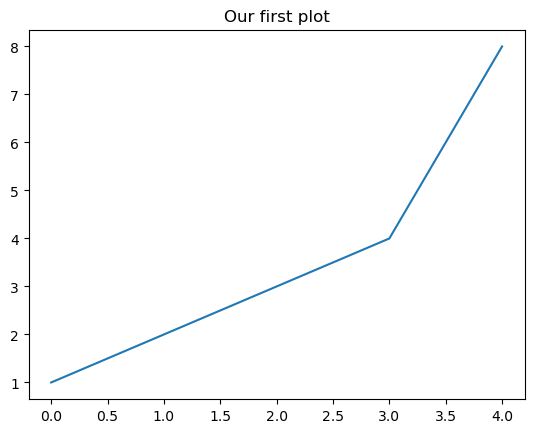

In [2]:
# Our first plot on very basic data

plt.plot([1, 2, 3, 4, 8])
plt.title('Our first plot')
plt.show() # What do you notice? How is the x-axis defined here?

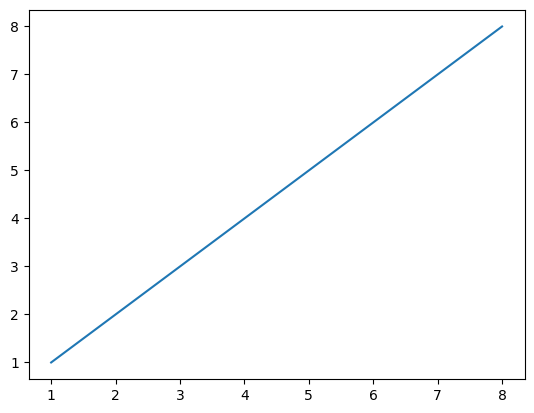

In [3]:
plt.plot([1, 2, 3, 8], [1, 2, 3, 8]) # If we want to print the function f(x) = x on the interval [1;8], we also need to specify values for x otherwise it will just take the index

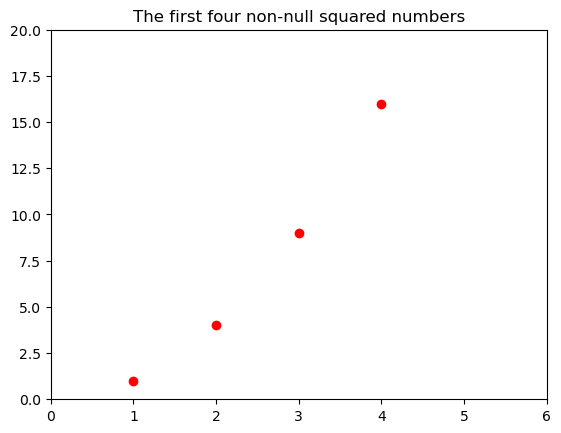

In [4]:
# Our first plots were using the default parameters but we can customize our plots

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # List of integers, their squares and the type of points to use
plt.axis((0, 6, 0, 20)) # The first 2 numbers correspond to the limit of the x-axis while the last 2 define the limits of the y-axis i.e. (xmin, xmax, ymin, ymax)
plt.title("The first four non-null squared numbers")
plt.show()

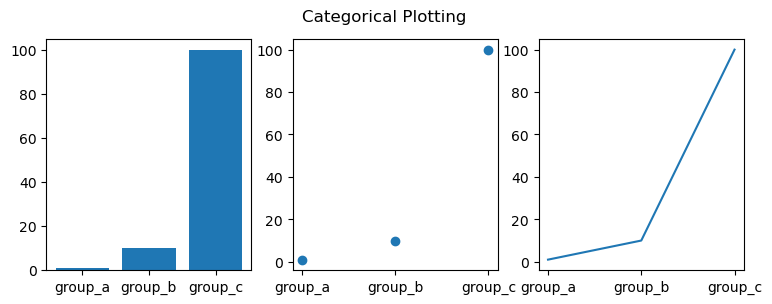

In [5]:
# Matplotlib works well with categorical variables too

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131) # Chart on the left
plt.bar(names, values)

plt.subplot(132) # Chart in the center
plt.scatter(names, values)

plt.subplot(133) # CHart on the right
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

Matplotlib offers a lot of other options but the main ones remain:


*   `plt.bar(x,y)` for bar charts
*   `plt.scatter(x,y)` for scatter plots
*   `plt.plot(x,y)` for a traditional plot with a line going through the points if we don't specify a third argument

To learn more about the customization possibilities, please refer to matplotlib's documentation and community. This [tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py) is a good start :)


## Bonus after class: Join, merge and concatenate DataFrames

In this section, we'll explore how to combine and manipulate data in Pandas using three essential operations: join, merge, and concatenate. These operations are crucial for handling datasets with multiple tables and performing complex analyses.

In [6]:
import pandas as pd

# Create two sample dataframes
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Age': [25, 30, 22]})

**JOIN**

Joining is a way to **combine two dataframes based on a common column**. It's similar to the SQL JOIN operation if you're familiar with SQL syntax. In our example, it will be useful to create a table with the name AND the age.

In [7]:
# Here, we want to join on ID as it is the identifier in both tables
joined_df = df1.set_index('ID').join(df2.set_index('ID'), how='inner')

In [8]:
joined_df

,Name,Age
ID,,
2,Bob,25
3,Charlie,30


As you may have noticed, we only have rows for Bob and Charlie because 2 and 3 are the only IDs that are present in both tables to when we realize an inner join, we only retrieve the data that is in both DataFrames.

**MERGE**

Merging is a more versatile operation that allows combining dataframes based on different criteria, such as multiple columns.

In [9]:
# We specify the column(s) we want to merge on and choose to do an outer join
merged_df = pd.merge(df1, df2, on='ID', how='outer')

In [10]:
merged_df

,ID,Name,Age
0,1,Alice,NaN
1,2,Bob,25.0
2,3,Charlie,30.0
3,4,NaN,22.0


As we choose an outer join, the resulting DataFrame contains all four rows but some of these rows have NaN values as they don't exist in one of the tables.

**CONCATENATE**

Concatenation is the process of combining two or more dataframes along a particular axis (i.e., columns or rows).

In [11]:
concatenated_df = pd.concat([df1, df2], ignore_index=True) # The default axis is 0 corresponding to the rows

In [12]:
concatenated_df

,ID,Name,Age
0,1,Alice,NaN
1,2,Bob,NaN
2,3,Charlie,NaN
3,2,NaN,25.0
4,3,NaN,30.0
5,4,NaN,22.0


Here, concatenating isn't really the kind of operation we want to do to combine our dataframes because they don't have the same columns so it's not really interesting to "add" the rows of one DataFrame to the other. Indeed, here, without specifying a common identifier, it won't be joining the data in a clean way.

## Exercise - Billboard 200 Analysis

Today, we will use data from the [billboard 200](https://www.billboard.com/charts/billboard-200/) that we scrap on the website. Next week, we'll delve deeper into the code below to understand how it can get data from a web page.

We will retrieve the 200 entries of the billboard in a DataFrame with different columns corresponding to some of the characteristics we can find on the page, such as the author or the number of weeks in the top 200.

In [13]:
def get_songs():
    songs_list = list()
    import requests
    import re
    from bs4 import BeautifulSoup

    url = "https://www.billboard.com/charts/billboard-200/"
    response = requests.get(url)

    if not response.status_code == 200:
        return None

    try:
        results_page = BeautifulSoup(response.content,'lxml')
        songs = results_page.find_all('div',{"class":"o-chart-results-list-row-container"})

        for song in songs:

            all_spans = song.find_all('span')

            song_ranking_non_formatted = all_spans[0].get_text()
            song_ranking = re.search(r'\d+', song_ranking_non_formatted).group()

            song_name_non_formatted = song.find('h3').get_text()
            song_name = re.sub(r'[\t\n]+', ' ', song_name_non_formatted).strip()

            if re.sub(r'[\t\n]+', ' ', all_spans[1].get_text()).strip()=='NEW':
                is_new = True
                is_reentry = False
                song_author_non_formatted = all_spans[3].get_text()
                song_author = re.sub(r'[\t\n]+', ' ', song_author_non_formatted).strip()
                last_week = '-'
                peak_position = song_ranking
                weeks_on_chart = 1

            elif re.sub(r'[\t\n]+', ' ', all_spans[1].get_text()).strip()=='RE- ENTRY':
                is_new = False
                is_reentry = True
                song_author_non_formatted = all_spans[3].get_text()
                song_author = re.sub(r'[\t\n]+', ' ', song_author_non_formatted).strip()
                last_week = '_'
                peak_position_non_formatted = all_spans[5].get_text()
                peak_position = re.search(r'\d+', peak_position_non_formatted).group()
                weeks_on_chart_non_formatted = all_spans[6].get_text()
                weeks_on_chart = re.search(r'\d+', weeks_on_chart_non_formatted).group()


            else:
                is_new = False
                is_reentry = False
                song_author_non_formatted = all_spans[1].get_text()
                song_author = re.sub(r'[\t\n]+', ' ', song_author_non_formatted).strip()
                last_week_non_formatted = all_spans[2].get_text()
                last_week = re.search(r'\d+', last_week_non_formatted).group()
                peak_position_non_formatted = all_spans[3].get_text()
                peak_position = re.search(r'\d+', peak_position_non_formatted).group()
                weeks_on_chart_non_formatted = all_spans[4].get_text()
                weeks_on_chart = re.search(r'\d+', weeks_on_chart_non_formatted).group()

            songs_list.append((song_ranking,song_name,song_author, is_new, is_reentry, last_week, peak_position, weeks_on_chart))
        return songs_list
    except:
        return None

In [14]:
import pandas as pd
df = pd.DataFrame(get_songs(),columns = ['Ranking','Title','Author','New','Re-Entry','Last Week','Peak Position', 'Weeks on Chart'])

In [15]:
df

,Ranking,Title,Author,New,Re-Entry,Last Week,Peak Position,Weeks on Chart
0,1,1989 (Taylor's Version),Taylor Swift,False,False,1,1,10
1,2,One Thing At A Time,Morgan Wallen,False,False,5,1,44
2,3,For All The Dogs,Drake,False,False,6,1,13
3,4,Pink Friday 2,Nicki Minaj,False,False,3,1,4
4,5,Midnights,Taylor Swift,False,False,9,1,63
...,...,...,...,...,...,...,...,...
195,196,Growin' Up,Luke Combs,False,True,_,2,70
196,197,Freudian,Daniel Caesar,False,True,_,25,103
197,198,Moana,Soundtrack,False,True,_,2,353
198,199,Indigo,Chris Brown,False,True,_,1,180


Now that we have the data, we can explore it by doing a few visualizations.

### 1. Plot the distribution of the number of weeks in top 200

In [ ]:
"""
Think about which steps you need to go through to format your data into distribution data:

- Which type of chart do you wanna use?
- What will your x-axis be? And your y-axis?
- According to what you want to have on your axes, how can you create the corresponding data objects from the dataframe above?

"""
# YOUR CODE HERE

# DON'T HESITATE TO USE SEVERAL CELLS TO VISUALIZE YOUR ACTIONS

There are a lot of different ways to plot this distribution so it's perfectly fine if you did differently:

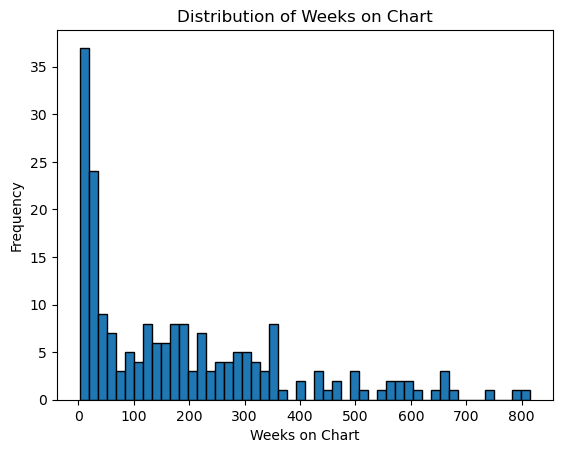

In [16]:
import matplotlib.pyplot as plt

# We want to group by the number of weeks in top 200 so we need to clean it first
df['Weeks on Chart'] = pd.to_numeric(df['Weeks on Chart'], errors='coerce') # This step is very important to handle errors
weeks_on_chart_data = df['Weeks on Chart']

# Create a histogram
plt.hist(weeks_on_chart_data, bins=50, edgecolor='k')  # You can adjust the number of bins as needed

# Add labels and a title to the plot
plt.xlabel('Weeks on Chart')
plt.ylabel('Frequency')
plt.title('Distribution of Weeks on Chart')

# Show the plot
plt.show()

What does it tell us on our data?
* A significant number of entries have been in the top 200 for more than a year (52+ weeks) in total.
* There is a concentration under 20 weeks which corresponds to all the quite recent entries.
* Our data doesnt't seem to follow a normal distribution (it would have had a bell-shaped curve).

### 2. Rank artists by the number of albums in the top 200

In [ ]:
"""
Likewise, you might want to use grouping. Once you've ranked artists by the number of songs they have in the top 200, try to add complexity by ranking them by the number of new songs in top 200. There are several approaches for that.
"""
# YOUR CODE HERE

# DON'T HESITATE TO USE SEVERAL CELLS TO VISUALIZE YOUR ACTIONS

In [18]:
# Group by artists and count the number of albums each artist has in the top 200
artist_album_counts = df.groupby('Author')['Title'].count()

# Sort this list
sorted_artist_album_counts = artist_album_counts.sort_values(ascending=False)

# Print the ranking of artists
print(sorted_artist_album_counts)

Author
Taylor Swift      10
Drake              7
Zach Bryan         4
Luke Combs         4
Soundtrack         4
                  ..
Grupo Frontera     1
George Strait      1
Fuerza Regida      1
Frank Sinatra      1
blink-182          1
Name: Title, Length: 131, dtype: int64


**Note:** The code was rerun on W2 2024 to make sure the web scraping was still working properly so the data corresponds to that period and isn't necessarily representative of the usual billboard 200 data.

### 3. Which album has the best progress week over week and was in the top 200 last week?

In [ ]:
"""
Think about how it translates into conditions on our data. Should you include the new and re-entry albums? Why?
You might want to create a new column to visualize the progress week over week.
"""
# YOUR CODE HERE

# DON'T HESITATE TO USE SEVERAL CELLS TO VISUALIZE YOUR ACTIONS

In [23]:
# Only select the albums that were already in top 200 last week
df_top_200_both_weeks = df[(df['New'] == False) & (df['Re-Entry'] == False)].copy()

df_top_200_both_weeks['Progress'] = df_top_200_both_weeks['Last Week'].astype(int) - df_top_200_both_weeks['Ranking'].astype(int)

best_progress_album = df_top_200_both_weeks.sort_values(by='Progress', ascending=False).iloc[0]

best_progress_album

Ranking                            76
Title             Bell Bottom Country
Author                  Lainey Wilson
New                             False
Re-Entry                        False
Last Week                         168
Peak Position                      51
Weeks on Chart                     59
Progress                           92
Name: 75, dtype: object

A progress of 92 means that Lainey Wilson's 'Bell Bottom Country' album earned 92 spots in the rankings, being 168th last week and 76th this week!